# Matplotlib으로 데이터 시각화하기

**데이터를 보기좋게 표현해봅시다.**

#### 1. Matplotlib 시작하기
   
#### 2. 자주 사용되는 Plotting의 Options
- 크기 : `figsize`
- 제목 : `title`
- 라벨 : `_label`
- 눈금 : `_tics`
- 범례 : `legend`
  
#### 3. Matplotlib Case Study
- 꺾은선 그래프 (Plot)
- 산점도 (Scatter Plot)
- 박스그림 (Box Plot)
- 막대그래프 (Bar Chart)
- 원형그래프 (Pie Chart)
  
#### 4. The 멋진 그래프, seaborn Case Study
- 커널밀도그림 (Kernel Density Plot)
- 카운트그림 (Count Plot)
- 캣그림 (Cat Plot)
- 스트립그림 (Strip Plot)
- 히트맵 (Heatmap)
  

## I. Matplotlib 시작하기

* 파이썬의 데이터 시각화 라이브러리
* %matplotlib inline을 통해서 활성화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

##II. Case Study with Arguments

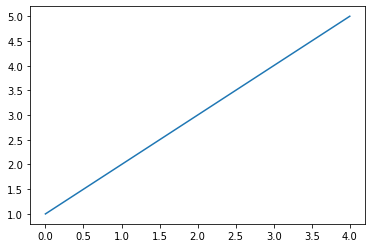

In [2]:
plt.plot([1,2,3,4,5]) #실제 plotting을 하는 함수 y=x+1
plt.show()  #plt를 확인하는 명령

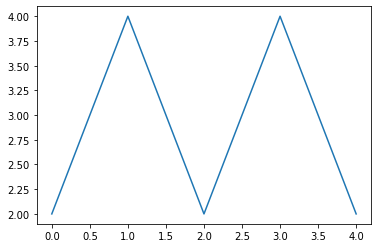

In [3]:
plt.plot([2,4,2,4,2]) #실제 plotting을 하는 함수 y=x+1
plt.show()  #plt를 확인하는 명령

###Figsize : Figsize(도면)의 크기 조절

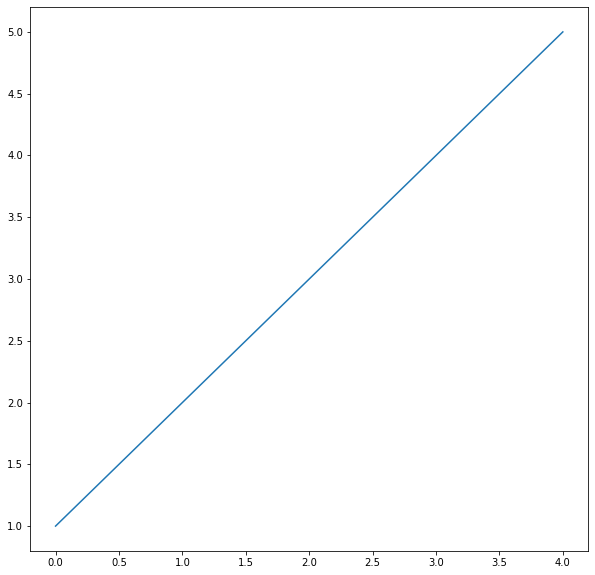

In [6]:
plt.figure(figsize=(10,10)) #plotting을 할 도면을 선언
plt.plot([1,2,3,4,5]) #실제 plotting을 하는 함수 y=x+1
plt.show()  #plt를 확인하는 명령

###2차함수 그래프 with plot()

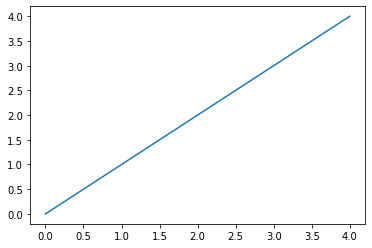

In [7]:
#리스트를 이용해서 1차함수 y=x를 그려보면 : 
plt.plot([0,1,2,3,4])
plt.show()

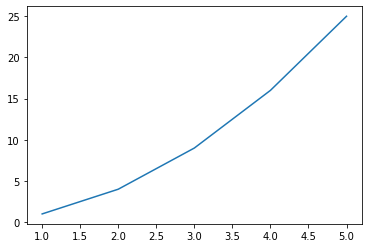

In [9]:
#numpy.array를 이용해서 함수 그래프 그리기
#y=x^2
x=np.array([1,2,3,4,5]) #정의역
y=np.array([1,4,9,16,25])  #f(x)

plt.plot(x,y)
plt.show()

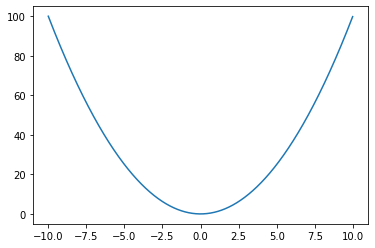

In [10]:
#np.arang(a,b,c) c:0.01
x=np.arange(-10,10,0.01)
plt.plot(x,x**2)
plt.show()

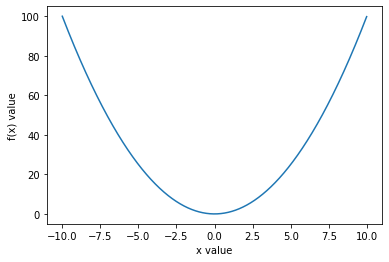

In [11]:
#x,y축에 설명 추가하기
x=np.arange(-10,10,0.01)
plt.xlabel("x value")
plt.ylabel("f(x) value")
plt.plot(x,x**2)
plt.show()

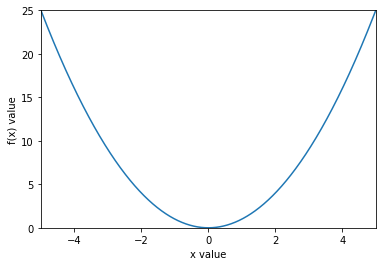

In [12]:
#x,y축의 범위를 설정하기
x=np.arange(-10,10,0.01)
plt.xlabel("x value")
plt.ylabel('f(x) value')

plt.axis([-5,5,0,25]) #[x_min,x_max, y_min,y_max]
plt.plot(x,x**2)

plt.show()

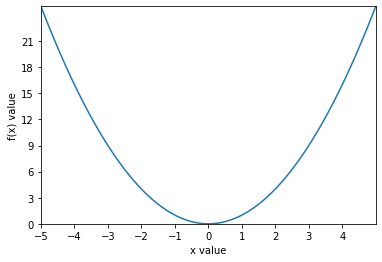

In [14]:
#x,y축에 눈금 설정하기
x=np.arange(-10,10,0.01)

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.axis([-5,5,0,25]) #[x_min,x_max, y_min,y_max]

plt.xticks([i for i in range(-5,5,1)])  #x축의 눈금 설정 -5,-4,-3,...
plt.yticks([i for i in range(0,24,3)])  #y축의 눈금 설정,

plt.plot(x,x**2)

plt.show()

In [ ]:
#그래프에 title 달기
x-np.arange(-10,10,0.01)

plt.xlabel("x value")
plt.ylabel('f(x) value')
plt.axis([-5,5,0,25]) #[x_min,x_max, y_min,y_max]

plt.xticks([i for i in range(-5,5,1)])  #x축의 눈금 설정 -5,-4,-3,...
plt.yticks([i for i in range(0,24,3)])  #y축의 눈금 설정,

plt.title('y=x^2 graph')
plt.plot(x,x**2, label='trend')
plt.legend()

plt.show()

## III. Matplotlib Case Study
꺾은선 그래프(plot)

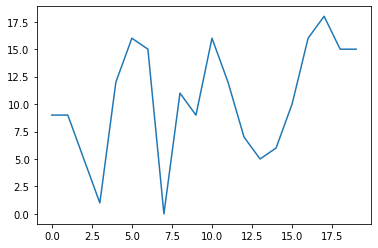

In [16]:
x=np.arange(20) #0~19
y=np.random.randint(0,20,20) #난수를 20번 생성

plt.plot(x,y)  

#Extra : y축을 20까지 보이게 하고 싶다면?, y축을 "5"단위로 보이게 하고 싶다면?
#.axis(), .ytics()
plt.axis([0,20,0,20])
plt.yticks([0,5,10,15,20])

plt.show()

###산점도(Scatter Plot)
* .scatter()

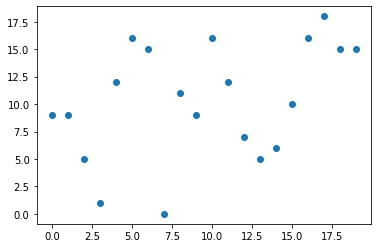

In [17]:
plt.scatter(x,y)
plt.show()

###박스그림(Box Plot)
* 수치형 데이터에 대한 정보(Q1, Q2, Q3, min, max)

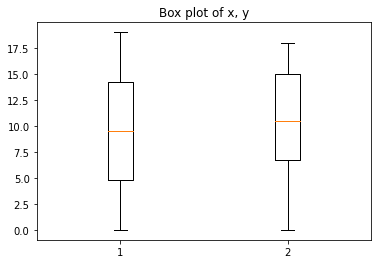

In [19]:
plt.boxplot((x,y))
plt.title("Box plot of x, y")
plt.show()

###막대 그래프(Bar Plot)
* 범주형 데이터의 "값"과 그 값의 크기를 직사각형으로 나타낸 그림

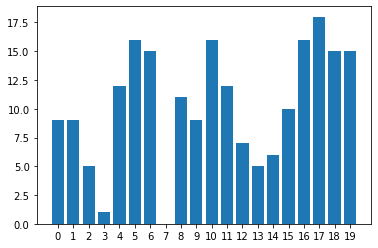

In [21]:
plt.bar(x,y)
plt.xticks(np.arange(0,20,1))

plt.show()

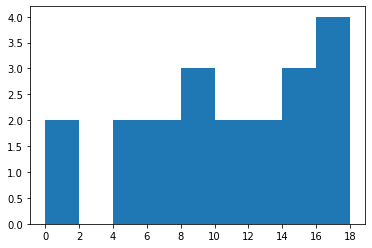

In [22]:
#cf) Histogram
#도수 분포를 직사각형의 막대형태로 나타냈다
#"계급"으로 나타낸 것이 특징 : 0,1,2가 아니라 0~2까지의 "범주형" 데이터로 구성 후 그림을 그림

plt.hist(y, bins=np.arange(0,20,2))
plt.xticks(np.arange(0,20,2))
plt.show()

###원형 그래프(Pie Chart)
* 데이터에서 전체에 대한 부분의 비율을 부채꼴로 나타낸 그래프
* 다른 그래프에 비해서 **비율** 확인에 용이
* .pie()

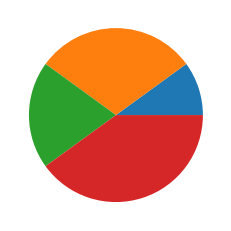

In [25]:
z=[100,300,200,400]
plt.pie(z)
plt.show()

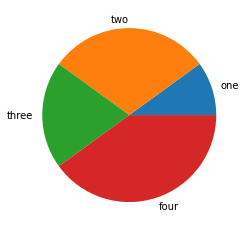

In [26]:
plt.pie(z, labels=['one', 'two', 'three','four'])
plt.show()

## IV. The 멋진 그래프, Seaborn Case Study

###Matplotlib를 기반으로 더 다양한 시각화 방법을 제공하는 라이브러리
* 커널밀도그림
* 카운트그림
* 캣그림
* 스트립그림
*히트맵

###Seaborn Import하기

In [29]:
import seaborn as sns

###커널밀도그림(Kernel Density Plot)
* 히스토그램과 같은 연속적인 분포를 곡선화해서 그린 그림
* sns.kdeplot()

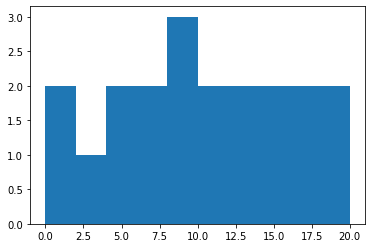

In [27]:
#in Histogram
x=np.arange(0,22,2)
y=np.random.randint(0,20,20)

plt.hist(y,bins=x)
plt.show()

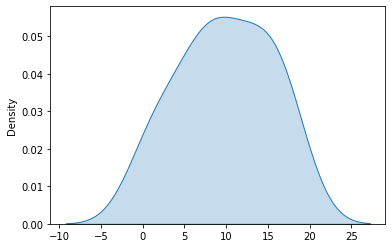

In [30]:
#kdeplot
sns.kdeplot(y,shade=True)
plt.show()

###카운트그림(Count Plot)
* 범주형 column의 빈도수를 시각화 -> Groupby 후의 도수를 하는 것과 동일한 효과
* sns.countplot()

In [31]:
vote_df=pd.DataFrame({"name": ['Andy', 'Bob', 'Cat'], "vote":[True, True, False]})

vote_df

,name,vote
0,Andy,True
1,Bob,True
2,Cat,False


In [32]:
#in matplotlib barplot
vote_count=vote_df.groupby('vote').count()
vote_count

,name
vote,
False,1
True,2


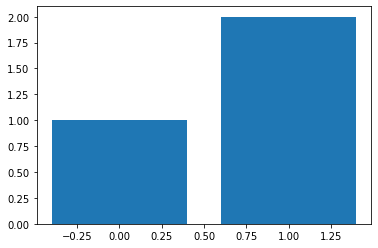

In [33]:
plt.bar(x=[False, True], height=vote_count['name'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


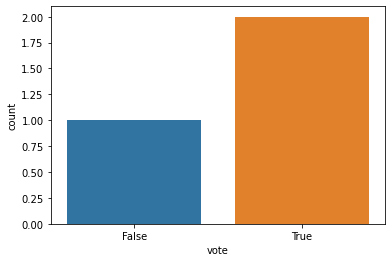

In [34]:
#sns의 countplot
sns.countplot(vote_df['vote'])
plt.show()

###캣그림(Cat Plot)
* 숫자형 변수와 하나 이상의 범주형 변수의 관계를 보여주는 함수
* sns.catplot()

In [39]:
covid=pd.read_csv('./country_wise_latest.csv')
covid.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


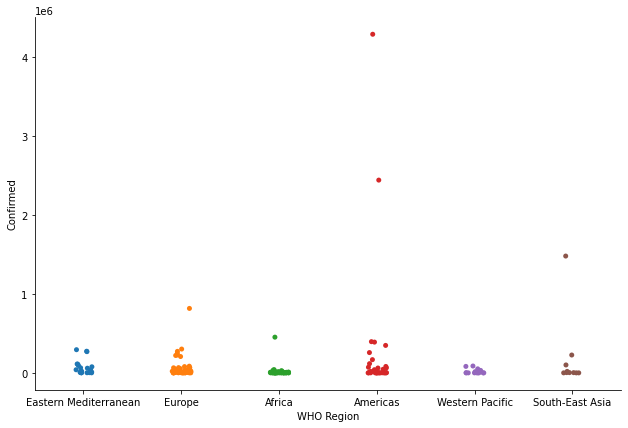

In [43]:
s=sns.catplot(x='WHO Region', y='Confirmed', data=covid)
s.fig.set_size_inches(10,6)
plt.show()

###스트립그림(Strip Plot)
* Scatter plot과 유사하게 데이터의 수치를 표현하는 그래프
* sns.stripplot()

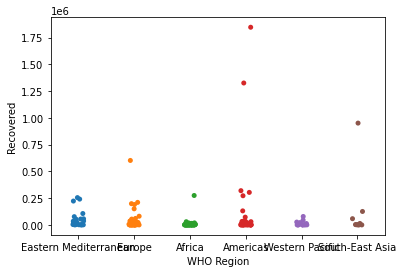

In [44]:
sns.stripplot(x='WHO Region', y='Recovered', data=covid)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; y

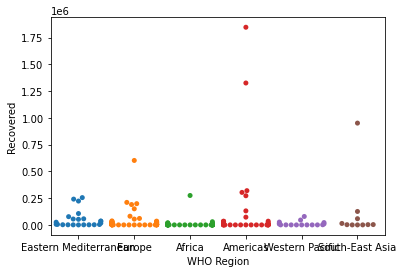

In [47]:
#cf)swarmplot
s=sns.swarmplot(x='WHO Region', y='Recovered', data=covid)
plt.show()

###히트맵(Heatmap)
* 데이터의 행렬을 색상으로 표현해주는 그래프
* sns.heatmap()

In [48]:
#히트맵 예제
covid.corr()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


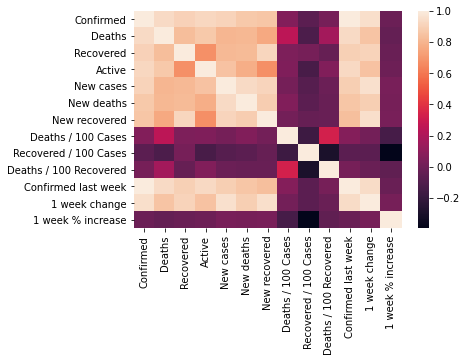

In [49]:
sns.heatmap(covid.corr())
plt.show()

## Mission:

### 